In [10]:
# print out each line in the input cell not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# expand the cell width to 70% of t 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

*Gruppe: Emils Bundzis, Chris Fröschl, Simon Gärtner*

# Kleines Projekt 3: Stufen - Aufgabe

## Modellierung eines Stufenabschnittes an einem Berghang

# Dokumentation und SageMath Skript

----

*Wir haben uns dazu entschlossen, die Dokumentation in das SageMath Skript einzubinden. Daher finden Sie hier eine ausführliche Erklärung des Problems, des Skriptes, der Ergebnisse und der Arbeitsaufteilung.*

## Problembeschreibung
---

*Worterklärungen:*
- Breite einer Stufe: Distanz linker Rand bis rechter Rand einer Stufe
- Höhe der Stufe: vertikale Distanz von Auftrittsfläche zur nächsten Auftriffsfläche
- Tiefe einer Stufe: Distanz vom vorderen bis hinteren Rand einer Stufe (Auftrittsbreite)


Diese Arbeit ist im Rahmen einer vierten Übungsaufgabe in der Vorlesung "Angewandte Mathematik" entstanden.

Ziel der Aufgabe ist es, einen Weg auf einen Hügel zu pflastern bzw. zu asphaltieren. Hierbei sind folgende Annahmen zu beachten:


- Der Weg muss 1,20 m breit sein.
- Asphaltiert werden kann nur, wenn die Steigung kleiner als 1/3 ist.
- Die Stufen sind genau 0,20 m hoch.
- Hügelstruktur ist vorgegeben:
    
| Abstand von der Hügelspitze | Höhe des Hügels |
|-----------------------------|-----------------|
| 0                           | 50              |
| 20                          | 47              |
| 40                          | 43              |
| 60                          | 38              |
| 80                          | 32              |
| 100                         | 25              |
| 120                         | 17              |
| 140                         | 8               |
| 160                         | 6               |
| 180                         | 2               |
| 200                         | 0               |


## Mathematisches Modell
---

### Mathematische Problemformulierung

Zur Darstellung der tatsächlichen Hügelstruktur (durch Tabellenwerte) müssen die Abstände von der Hügelspitze und die Höhe des Hügels gebündelt als Koordinaten abspeichert werden.

Das Zahlenpaar (40, 43) bedeutet z.B., dass im horizontalen Abstand von 40 m vom ersten Messpunkt (x = 0) die Höhe des Hügels 43 m beträgt.

Ziel ist es, die Punkte bestmöglich durch eine Funktion abzubilden.

Hierfür versuchen wir die Funktion erst durch ein überbestimmtes Gleichungssystem zu lösen. Die Gleichungen haben hierbei die Form:
$$
y = w_3 * x^3 + w_2 * x^2 + w_1 * x + w_0.
$$

So kommt man bei 11 Messpunkten zu einem LGS mit 3 Unbekannten und 11 Gleichungen.

Wenn dieses nicht exakt gelöst werden kann, versuchen wir, die Messpunkte durch eine Annäherung zu approximieren. Hierfür verwenden wir die Methode der kleinsten Quadrate (eng. least square). Diese wird dazu verwendet, um eine Funktion eines speziellen Grades zu erstellen, die entweder alle Punkte schneidet oder in deren Nähe kommt. Dabei liefert die Methode immer den kleinstmöglichen Fehler zu den Datenpunkten.

![Bild 1](https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg)

Um die Anzahl der benötigten Stufen zu bestimmen, wurde folgender Algorithmus ausgearbeitet:

![Bild 2](get-all-stairs.png)


1. Zunächst werden die Bereiche, in denen die Steigung größer als 1/3 ist, berechnet. Dies sind die Intervalle, in denen Treppen platziert werden müssen. Dafür wird die Ableitung der approximierten Funktion gebildet und geprüft, wann die Steigung der Funktion > $1/3$ ist.
2. Von diesen Bereichen wird jeweils die Höhendifferenz bestimmt.
3. Die Höhendifferenz wird dazu verwendet, um die Anzahl der Stufen mit der gegebenen Stufenhöhe zu bestimmen.
4. Durch die nun gegebene Anzahl der Stufen kann die durchschnittliche Tiefe der Stufen berechnet werden.

Da bei der Anzahl der Stufen meist eine Gleitkommazahl herauskommt, darf die letzte Stufe nur einen Anteil der durchschnittlichen Tiefe tief sein. Somit ist sie die einzige Stufe, die weniger tief ist als alle anderen.

Die Länge des asphaltierten Wegs ergibt sich aus der Differenz des ganzen Wegs und des bestuften Bereichs.

Dabei lässt sich die Länge einer Kurve $y = f(x)$ im Bereich $[a, b] ⊆ R$ durch das Integral

$$
\int_a^b \sqrt{1 + (f'(x))^2}
$$

berechnen.

### Verwendete Software für die Ergebnisberechnungen

- SageMath

## Implementierung in SageMath & Analyse und Deutung der Ergebnisse
---

### Aufgabe 1

In Aufgabe 1 wird eine Funktion gesucht, die die gegebenen Punkte schneidet. Daher versuchen wir erst die Funktion mit Hilfe eines Gleichungssystems exakt zu berechnen. Wenn dies nicht zu einem Ergebnis führt, suchen wir eine Näherungslösung.

---

Im ersten Abschnitt der Implementierung werden alle benötigten Parameter definiert. So werden die fünf verschiedenen Variablen `w0` bis `w3` und `x` definiert.

Anschließend wird der grundlegende Aufbau der Funktion festgelegt, die die Punkte näherungsweise darstellen soll. Dieser Aufbau wird in der Variablen `model` gespeichert.

Anschließend werden verschiedene Parameter gemäß der Aufgabenstellung definiert. Hierzu gehören die Stufenhöhe (`stair_heigt`), die Breite des Weges (`width`) und die maximale Steigung für einen Asphaltweg (`max_gradient`).

In der Liste `points` werden die Messpunkte aus der Aufgabenstellung abgespeichert.

In [11]:
# define all parameters
w0, w1, w2, w3, x = var('w0', 'w1', 'w2', 'w3', 'x')

# define approx model
model(x) = w0 + w1*x + w2*x**2 + w3*x**3

# define stair heigt
stair_height = 0.2

# define width of the street
width = 1.2

# define points
points = [(0, 50), (20, 47), (40, 43), (60, 38), (80, 32), (100, 25), (120, 17), (140, 8), (160, 6), (180, 2), (200, 0)]

# define max gradient
max_gradient = 1/3

Die Methode `createFunction(x, y)` definiert für die übergebenen x und y Werte eine Gleichung mit den unbekannten w's und gibt diese zurück.

In [12]:
def createFunction(x, y):
    """
    Create function (polynom - thrid degree).
    
    Parameters:
        x(float): defines the x value of the function.
        
        y(float): defines the y value of the function.
        
    Returns:
        mathematical function: contains the defined values.
    """
    return w0 + w1*x + w2*x**2 + w3*x**3 == y

Die Methode `getAllFunctions(points)` erstellt für jeden Punkt in der Liste `points` eine Gleichung und fasst diese in einer Liste zusammen.

In [13]:
def getAllFunctions(points):
    """
    Create a list with functions. For each point one. Have the unknown w0, w1, w2 and w3. Creates a list for a linear equation system.
    
    Prameters:
        points(list): contains all specified points.
        
    Returns:
        list: contains all functions for the linear equation system.
    """
    functions = []

    for point in points:
        functions.append(createFunction(point[0], point[1]))
    
    return functions

Die Methode `getExactSolution(points, model)` erstellt ein lineares Gleichungssystem aus den Punkten und dem Polynom dritten Grades und versucht diese exakt zu lösen.

In [14]:
def getExactSolution(points, model):
    """
    Try to solve the linear equation system exactly.
    
    Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        list: contains all values for w0, w1, w2 and w3.
    """
    return solve(getAllFunctions(points), w0, w1, w2, w3)

Da obige Methode zu keinem Ergebnis kommt, wird mit der Methode `getApproxSolution(points, model)` eine Näherungslösung gesucht und zurückgegeben. Die zurückgegebene Funktion liefert dann eine Funktion, die bestmöglich alle Punkte schneidet.

In [15]:
def getApproxSolution(points, model):
    """
    If there is no excat solution solve the equation approximately.
    
      Parameters:
        points(list): contains all specified points.
        
        model(mathematical function): plonomial third degree.
        
    Returns:
        dict: contains all values for w0, w1, w2 and w3.
    """
    return find_fit(points,model,solution_dict=True)

Die Methode `plotPointsAndFunction(approx, points)` bekommt die Näherungswerte `w0` bis `w3` und die Punktliste. Mit diesen Werten erstellt sie eine Funktion und plottet diese zusammen mit den Punkten.

In [16]:
def plotPointsAndFunction(approx, points):
    """
    Plot the approximated function and all the points.
    
    Parameters:
        approx(dict): contains all approximated values for the function.
        
        points(list): contains all specified points.
    
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    for element in points:
        g += point(element, color='red', size=30)
        
    return g

### Aufgabe 2

In Aufgabe 2 wird der Bereich der Treppen ermittelt und analysiert. Zur Analyse gehört, wie viele Stufen benötigt werden, um diesen Bereich abzudecken und wie tief diese Stufen sein müssen.

---

Die Methode `defineFunction(approx, x)` bekommt die Werte für `w0` bis `w3` und erstellt daraus eine Funktion. Diese Funktion wird dann zurückgeliefert.

In [17]:
def defineFunction(approx, x):
    """
    Calculate function using an approxmation dictonary.
    
    Parmeters:
        approx(dict): Dictonary of approxmation values for the coefficients.
        
        x(float): The input value for which the function will be evaluated.
    
    Returns:
        float: value of function or function itself when x is trasmitted for x
    
    """
    return approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3

Die Methode `getDiffOfFunction(func)` berechnet die Ableitungsfunktion der übergebenen Funktion.

In [18]:
def getDiffOfFunction(func):
    """
    Calcuate the derivation of a function.
    
    Parameters:
        func(mathematical function): Function which should be derive.
        
    Returns:
        mathematical function: derivation of the transmitted function.
    """
    return diff(func)

Die Methode `getGradient(func, x)` setzt den übergebenen x Wert in die übergebene Funktion ein und liefert das Ergebnis zurück. 

In [19]:
def getGradient(func, x):
    """
    Claculate value of a function at a specific point.
    
    Parameters:
        func(mathematical function): function which should be evaluated.
        
        x(float): specifc x value.
    
    Returns:
        float: y value of function at the definied x value.
    """
    return func(x)

Die Methode `getMaxGradient(func, a, b)` berechnet das lokale Minimum in einem übergebenen Intervall.

In [20]:
def getMaxGradient(func, a, b):
    """
    Calculate the maximum of a function.
    
    Parameters:
        func(mathematical function): function which should be evaluated.
        
        a(float): start value of evaluated interval.
        
        b(float): start value of evaluated interval.
        
    Return:
        tupel: coordinates of maximum.
    """
    return find_local_minimum(func, a, b)

Die Methode `getMinMaxOfPoints(points)` berechnet den maximalen und minimalen x Wert der Punktliste.

In [21]:
def getMinMaxOfPoints(points):
    """
    Calculate the min x value and the max x value.
    
    Parameters:
        points(list): list which cointains all points
    
    Returns:
        tupel: fst value min x value and snd value max x value
    """
    min_x = 0
    max_x = 0
    
    for point in points:
        min_x = min(point[0], min_x)
        max_x = max(point[0], max_x)
    
    return (min_x, max_x)

Die Methode `getGradientExact(func, max_gradient, points)` berechnet die Intervalle, in denen die Steigung größer oder gleich der übergebenen Steigung `max_gradient` ist, und gibt diese als Tupel in einer Liste zurück.

In [22]:
def getGradientExact(func, max_gradient, points):
    """
    Calculate intervals where the gradient is bigger or equal 1/3.
    
    Parameters:
        func(mathematical function): function which schould be evaluated.
        
    Returns:
        list: contains all intervals where the gradient is bigger or equal 1/3.
    """
    max_values = getMinMaxOfPoints(points)
    
    intervals = []
       
    if max_gradient <= abs(getMaxGradient(func, max_values[0], max_values[1])[0]):
    
        sol = solve(func == max_gradient * -1, x, solution_dict = True)

        for index in range(0, len(sol), 2):
            x_min_value = round(sol[index][x], 20)                       
            x_max_value = round(sol[index+1][x], 20)
                        
            if x_min_value < max_values[0]:
                x_min_value = max_values[0]
            
            if x_max_value > max_values[1] - 1:
                x_max_value = max_values[1]
                
            intervals.append((x_min_value, x_max_value))
        
    return intervals

Die Methode `getAllStairs(intervals, func)` berechnet zu jedem Treppenintervall alle Informationen. Hierzu gehören neben dem Start und End x-Wert, der Höhenunterschied, die Anzahl der Stufen und die Tiefe der Stufen.

In [23]:
def getAllStairs(intervals, func):
    """
    Calculate and collect all information about the stair intervals.
    
    Parameters:
        intervals(list): contains start and end point of stair interval.
        
        func (mathematical function): function in which the stairs are.
    
    Returns:
        list[dict]: returns a list which include a dictonary with all information about one stair interval.
    """

    allStairs = []

    for interval in intervals:

        difference = abs(getGradient(func, interval[0]) - getGradient(func, interval[1]))

        amountOfStairs = difference / stair_height

        averageLength = (interval[1] - interval[0]) / amountOfStairs

        allStairs.append({'start' : interval[0], 'end': interval[1], 'stair_length': averageLength, 'amountOfStairs': amountOfStairs, 'difference': difference})

    return allStairs

Die Methode `printInformationAsTable(intervals, stair_height)` bekommt alle Informationen über die Stufenintervalle und erstellt eine Tabelle, die alle Informationen nochmals visualisiert. Hierbei werden die Werte noch einmal angepasst, sodass es z.B. nur eine ganze Anzahl an Stufen gibt. Mit dieser Anpassung wird auch die Tiefe der Stufen angepasst.

In [24]:
def printInformationAsTable(intervals, stair_height):
    """
    Create a table with all stair information.
    Contains:   - height of stair
                - length of stair
                - amount of stairs with this properties
    
    Parameter:
        intervals(list[dict]): contains all information about the stair intervals.
        
        stair_height(float): defines the height of the stairs (global variable).
        
    Returns:
        Table: with the properties of all stairs.
    """
    
    content = []
    
    for interval in intervals:
        full_stairs = floor(interval['amountOfStairs'])
        roundLength = round(interval['stair_length'], 2)
                
        content.append([round(stair_height, 2), roundLength, full_stairs])
        
        smallerLength = interval['stair_length'] * (interval['amountOfStairs']- full_stairs)
        smallerLength = round(smallerLength, 2)
        
        content.append([round(stair_height, 2), smallerLength, 1])
    
    return table(content, header_row=['Stair height', 'Stair depth', 'Amount'], frame=True, align='center')

Die Methode `paintStairIntervals(intervals, approx)` gibt die Funktion als Plot aus und kennzeichnet in diesem das Stufenintervall.

In [25]:
def paintStairIntervals(intervals, approx):
    """
    Plot the approximate function and mark the stairs area.
    
    Parameters:
    
        intervals(list): contains all information about the stair intervals.
        
        approx(dict): approxmiate coefficients of function.
    
    Returns:
        graphical object: contains all plots.
    """

    g = Graphics()

    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, legend_label='Approxmierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)


    for interval in intervals:
        g += plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, color='red', xmin=interval[0], xmax=interval[1], thickness = 2, legend_label='Steigung zu groß für Asphalt', axes_labels=['Horizontal length', 'Height'], frame=True)

    return g

Die Methode `plotBothFunctions(approx)` plottet einmal die übergebene Funktion und deren Ableitungsfunktion in einen Plot.

In [26]:
def plotBothFunctions(approx):
    """
    Plot two functions. The transmitted one and the derivation of this function.
    
    Parmeters:
        approx(dict): approxmiate coefficients of function.
        
    Returns:
        graphical object: contains all plots.
    """
    g = Graphics()
    h = Graphics()
    
    g = plot(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3, xmax = 200, ymax = 50, ymin = -10, thickness = 2, legend_label='Approximierte Funktion f', axes_labels=['Horizontal length', 'Height'], frame=True)

    g += plot(diff(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3), xmax = 200, ymax = 50, ymin = -10, color='red', thickness = 2, legend_label='Abgeleitete Funktion von f', axes_labels=['Horizontal length', 'Height'], frame=True)
    h =  plot(diff(approx[w0] + approx[w1]*x + approx[w2]*x**2 + approx[w3]*x**3), color='red', thickness = 1, xmax = 200, xmin = 0, ymax = 1, ymin = -1)
    
    return g.inset(h, pos=(0.15, 0.25, 0.3, 0.3))

### Aufgabe 3

In Aufgabe 3 werden die entsprechenden Längen für die Asphaltstraßen berechnet. Hierfür wird die vorgegebene Funktion verwendet. 

---

Die Methode `getLength(func, start, end)` ermittelt die Länge der Funktion zwischen einem `start` und einem `end` Wert.

In [27]:
def getLength(func, start, end):
    """
    Calculate the length of the function in a specific interval.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        start(float): starting x point.
        
        end(float): end x point.
    
    Returns:
        float: length of the function in this interval.
    """
    return integral(sqrt(1 + (func) ** 2), x, start, end)

Die Methode `getAsphaltLength(func, stairInterval)` berechnet die Länge des Asphalts. Hierfür wird zuerst die Gesamtlänge berechnet und anschließend die Stufenintervalle wieder abgezogen.

In [28]:
def getAsphaltLength(func, stairInterval):
    """
    Calculate the length of the asphalt street.
    
    Parameters:
        func(mathematical function): function which should be measured.
        
        stairInterval(list[dict]): list with all stair intervals -> no asphalt.
        
    Returns:
        float: length of asphalt.
    """

    max_values = getMinMaxOfPoints(points)
    
    length = getLength(func, max_values[0], max_values[1])

    for interval in stairInterval:

        length -= getLength(func, interval['start'], interval['end'])

    return length

### Aufgabe 4

- Asphaltieren: 20 EUR/Quadratmeter
- Stufen: 30 EUR/Quadratmeter (nur horizontale Fläche)

Da die Länge des Asphalts schon in Aufgabe 3 berechnet wurde, kann der Preis berechnet werden:

$$
Preis Asphalt = AsphaltLänge * Wegbreite * AsphaltPreis
$$

Die Kosten der Stufen sind an die zuvor berechneten Stufenintervalle aus Aufgabe 2 gebunden. Dabei iterieren wir über die Intervalle und summieren die Kosten pro Intervall

$$
IntervallKosten = ( IntervallEnde - IntervallBeginn ) * Wegbreite * 30
$$


---

Die Methode `costCalculationAsphalt(length, width)` berechnet aus der festgelegten Weglänge und der Breite des Weges die Kosten für den Asphalt.

In [29]:
def costCalculationAsphalt(length, width):
    """
    Calculate costs of asphalt.
    
    Parameters:
        length(float): length of asphalt.
        
        width(float): width of the street.
        
    Returns:
        float: costs of asphalt -> rounded of two decimal places.
    """
    return round(length * width * 20, 2)

Die Methode `costCalculationStairs(intervals, width)` berechnet die Kosten für die Stufen. Hierfür wird die Tiefe der Stufen aufaddiert und mit der Breite und dem Preis verrechnet.

In [30]:
def costCalculationStairs(intervals, width):
    """
    Calculate costs of stairs.
    
    Parameters:
        intervals(list[dict]): contains all information about one stair interval.
        
        width(float): width of the street.
    
    Returns:
        float: costs of the stairs -> rounded of two decimal places.
    """
    costs = 0

    for interval in intervals:
        costs += (interval['end'] - interval['start']) * width * 30

    return round(costs, 2)

## Ablauf komplettes Programm inkl. Ergebnisse

### Hügelpunkte plotten und durch Polynom dritten Grades approximieren

In [31]:
approx = getApproxSolution(points, model)
f(x) = defineFunction(approx, x)

print('Approximierte Funktion:')
f

Approximierte Funktion:


x |--> (1.175213765043847e-05)*x^3 - 0.003444056228566775*x^2 - 0.02742810366645668*x + 49.46853109925234

### Funktion f ableiten, um Steigung an unterschiedlichen Punkten zu ermitteln

In [32]:
f_2(x) = getDiffOfFunction(f)

print('Abgeleitete Funktion f:')
f_2

Abgeleitete Funktion f:


x |--> (3.525641295131541e-05)*x^2 - 0.00688811245713355*x - 0.02742810366645668

### Funktion f mit Hügel-Punkten plotten

Funktion f mit Hügelpunkten:


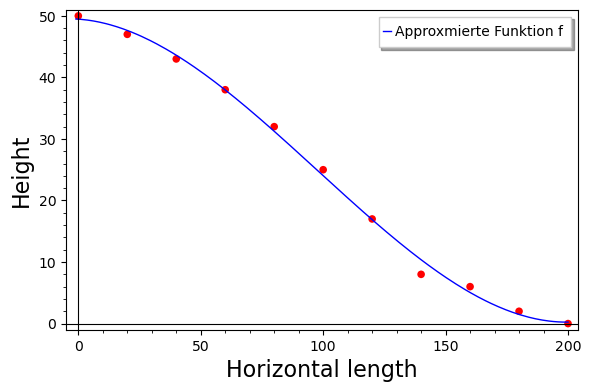

In [33]:
print('Funktion f mit Hügelpunkten:')
plotPointsAndFunction(approx, points)

### Funktion f und deren Ableitung f' in einem Plot darstellen

Funktion f und deren Ableitungsfunktion:


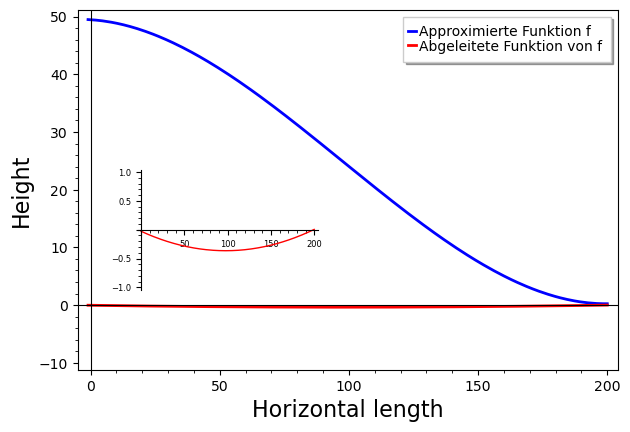

In [34]:
print('Funktion f und deren Ableitungsfunktion:')

plotBothFunctions(approx)

### Bereich der Funktion f berechnen, in denen die Steigung zu groß ist

Intervalle, in denen die Steigung zu groß für Asphalt ist:


[(68.25873583808355, 127.11316619418382)]

Intervall markiert im Plot:


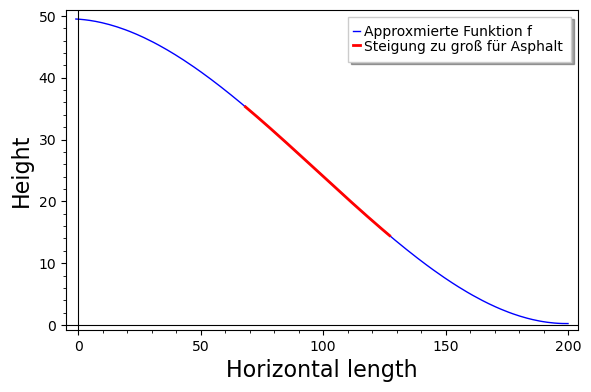

In [35]:
intervals = getGradientExact(f_2, max_gradient, points)

print('Intervalle, in denen die Steigung zu groß für Asphalt ist:')
intervals

print('Intervall markiert im Plot:')
paintStairIntervals(intervals, approx)

### Ermittlung genauerer Informationen zu den einzelnen Stufenintervallen

In [36]:
intervals = getAllStairs(intervals, f)

print('Exakte Informationen zu jedem Stufenintervall:')
intervals

print('Ausgabe als Tabelle: ')
printInformationAsTable(intervals, stair_height)

Exakte Informationen zu jedem Stufenintervall:


[{'start': 68.25873583808355,
  'end': 127.11316619418382,
  'stair_length': 0.5654715405330049,
  'amountOfStairs': 104.08026954039981,
  'difference': 20.81605390807996}]

Ausgabe als Tabelle: 


Stair height,Stair depth,Amount
,,
,,


### Ermittlung der Asphaltlänge

In [37]:
length = getAsphaltLength(f_2, intervals)

print('Länge, auf der asphaltiert werden muss:')
round(length, 2)

// Giac share root-directory:/usr/share/giac/
// Giac share root-directory:/usr/share/giac/
Added 0 synonyms


Länge auf der aphaltiert werden muss:


144.57

### Kostenermittlung für Asphalt und Stufen

In [38]:
costsAsphalt = costCalculationAsphalt(length, width)
costsStairs = costCalculationStairs(intervals, width)

print('Kosten für Asphalt:')
costsAsphalt

print('Kosten für Stufen:')
costsStairs

Kosten für Asphalt:


3469.73

Kosten für Stufen:


2118.76

### Gesamtkosten

In [39]:
combinedCosts = costsAsphalt + costsStairs

print('Gesamtkosten:')
combinedCosts

Gesamtkosten:


5588.49

### Tool für variable Auswertung

---

Dieses Tool lässt das Programm nochmal durchlaufen, allerdings kann man die festgelegten Werte `stair_heigt`, `width` und `max_gradient` variable über die Slider unten festlegen. Nach einer Änderung an den Slidern berechnet die Methode alle Informationen erneut und gibt die wichtigsten Informationen aus.

In [40]:
@interact
def analyse(Max_Gradient=(0, 1, 0.01), Width=(1, 10, 0.1), Stair_Height=(0, 1, 0.1)):
    """
    Analyse tool for variable gradient.
    
    Parameters:
        Max_Gradient(float): content of slider to perform calculation again with new gradient.
        
    Returns:
        Table: contain all information about the stairs
    """
    approx = getApproxSolution(points, model)
    f(x) = defineFunction(approx, x)
    
    f_2(x) = getDiffOfFunction(f)

    intervals = getGradientExact(f_2, Max_Gradient, points)

    gp = paintStairIntervals(intervals, approx)
    
    intervals = getAllStairs(intervals, f)

    t = printInformationAsTable(intervals, Stair_Height)
    
    length = getAsphaltLength(f_2, intervals)

    costsAsphalt = costCalculationAsphalt(length, Width)
    costsStairs = costCalculationStairs(intervals, Width)

    combinedCosts = costsAsphalt + costsStairs
    
    gp.show()
    print('Länge des Asphalts: ' + str(round(length,2)))
    print('Kosten für Asphalt: ' + str(costsAsphalt))
    print('Kosten für Stufen: ' + str(costsStairs))
    print('Gesamtkosten: ' + str(combinedCosts))
    
    return t

Interactive function <function analyse at 0x7f550cafef80> with 3 widgets
  Max_Gradient: FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Max_Gradient')
  Width: FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1, description='Width')
  Stair_Height: FloatSlider(value=0.0, min=0.0, max=1.0, step=0.1, description='Stair_Height')

## Fazit
---

Das Projekt hat sein erhofftes Ergebnis erreicht.

Die Hügeldaten konnten mittels SageMath implementiert, visualisiert und beurteilt werden.

Ebenso konnten die Stufenzahl, die Länge der asphaltierten Stücke und die Kosten des gesamten Weges berechnet werden.

Da unser Algorithmus mit einer konstanten Stufengröße arbeitet, kann es jedoch zu einem Problemfall kommen. Sollte sich die Steigung stark verändern, kann es dazu führen, dass der Algorithmus Stufen in den Berg "hinein legen" oder sie in der Luft anordnen würde.

Dies passiert, da die Steigung, wenn man nur die Stufen betrachtet, vom Anfang der Stufen bis zum Ende konstant ist (Grund hierfür ist die gleiche Tiefe der Stufen). Wenn sich aber die Funktion in diesem Intervall stark verändert und nicht wie die Stufen eine konstante Steigung hat, kann es passieren, dass man für den Bau der Stufen ein Teil des Berges abtragen oder auffüllen müsste.

Eine mögliche Lösung wäre, dass man eine Konstante festlegt, die bestimmt, wie stark die Steigung der Funktion in einem Intervall schwanken darf. Wenn sie diese Konstante überschreitet, beendet man das Intervall und startet ein neues. Sollte dies der Fall sein, dann erhält man mehrere Intervalle und auch mehrere Stufen, aber die Wahrscheinlichkeit, dass man Anpassungen am Berg vornehmen müsste, ist geriner.

Da unser Zieldatensatz nicht diesem Sonderfall entspricht, wurde hier jedoch an der Logik der gleichen Stufengröße festgehalten. Die obige Beschreibung dient jedoch als potentieller Ausblick für zukünftige Erweiterungen.

## Arbeitsaufteilung
---

- Chris Fröschl: Dokumentation, mathematische Modellierung
- Simon Gärtner: Aufgabe 1, 2, 3, 4, Analyse Tool, Dokumentation, mathematische Modellierung
- Emils Bundzis: Dokumentation, mathematische Modellierung

## Literatur
---

### Bildquellen

- Bild 1: https://upload.wikimedia.org/wikipedia/commons/1/17/MDKQ1.svg